<a href="https://colab.research.google.com/github/caiochacon/ufpb_intro_cd/blob/main/Exerc%C3%ADcio_Caio_Lucas_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Código para carregar os dados aqui
df = pd.read_csv('https://raw.githubusercontent.com/yurimalheiros/icd/master/datasets/movies.csv')

Visualize os dados com um gráfico de dispersão:

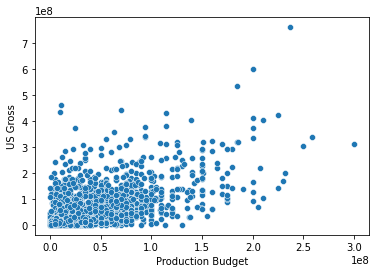

In [56]:
# Código para visualizar os dados aqui
sns.scatterplot(data=df, x= 'Production Budget', y='US Gross')

In [50]:
# Retirando os dados com nan
df_notnull = df[df['US Gross'].notnull()]
df_notnull = df_notnull[df_notnull['Production Budget'].notnull()]
print("Linhas do df:",df.shape[0])
print("Linhas do df sem os valores nulos:", df_notnull.shape[0])

# Como é uma diferença de apenas 8 valores, julguei que não era problemático retirar os valores nulos.

Linhas do df: 3201
Linhas do df sem os valores nulos: 3193


Use a regressão linear para encontrar os coeficientes a e b:

In [49]:
# Código da regressão linear aqui
from scipy.stats import linregress
result = linregress(df_notnull['Production Budget'], df_notnull['US Gross'])
print("Valor de a:", result.slope)
print("Valor de b:", result.intercept)

Valor de a: 1.0957226466834868
Valor de b: 9896486.136543602


Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [52]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

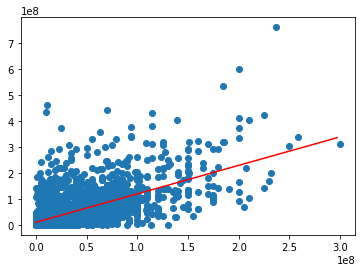

In [57]:
a = result.slope
b = result.intercept
show_regression(df_notnull["Production Budget"], df_notnull["US Gross"], a, b)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [69]:
a = 22222.12345
print(a2f)

SyntaxError: ignored

In [81]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    '10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.37'
    """
    # ADICIONE O SEU CÓDIGO AQUI
    return ((a*production_budget ) + b)
predict(5000000)

15375099.369961036

## Teste

In [79]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
ok
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    '10992208.78'
ok
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.37'
ok
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
1 items passed all tests:
   3 tests in __main__.predict
3 tests in 4 items.
3 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=3)